<a href="https://colab.research.google.com/github/danpele/Stat_fin_markets/blob/master/SFM_Week_effect_bitcoin/SFM_Week_effect_bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Weekend Effect for Bitcoin Market
#Hipothesis: The bitcoin prices are likely to fall
#on Monday. Means the closing
#price of Monday is less than the
#bitcoin price of previous Friday. 
#Author: Dragos Cioata
#Submitted: 04 Mar 2019

#import
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import datetime  as dt
from astropy.table import Table
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import requests
import io

#read csv data

url = "https://raw.githubusercontent.com/danpele/Stat_fin_markets/master/SFM_Week_effect_bitcoin/BTC-USD.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(url, error_bad_lines=False)
#print 5 rows 
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2  meandiff p-adj   lower    upper   reject
-----------------------------------------------------------
  Friday    Monday  -0.7847   0.9 -581.2979 579.7286  False
  Friday  Saturday   1.1907   0.9 -579.3226  581.704  False
  Friday    Sunday  -5.1985   0.9 -586.0332 575.6361  False
  Friday  Thursday  -5.5206   0.9 -586.0339 574.9927  False
  Friday   Tuesday  -7.7962   0.9 -588.3094 572.7171  False
  Friday Wednesday  -0.4358   0.9 -580.9491 580.0775  False
  Monday  Saturday   1.9754   0.9 -578.8579 582.8086  False
  Monday    Sunday  -4.4139   0.9 -585.5683 576.7405  False
  Monday  Thursday  -4.7359   0.9 -585.5691 576.0973  False
  Monday   Tuesday  -7.0115   0.9 -587.8447 573.8217  False
  Monday Wednesday   0.3489   0.9 -580.4843 581.1821  False
Saturday    Sunday  -6.3892   0.9 -587.5436 574.7651  False
Saturday  Thursday  -6.7113   0.9 -587.5445 574.1219  False
Saturday   Tuesday  -8.9869   0.9 -589.8

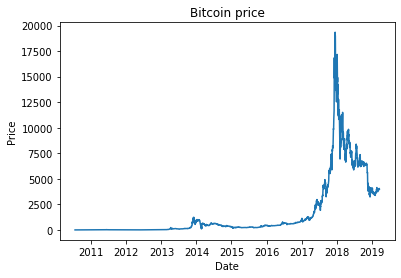

In [13]:
#kepp de date and de close price
df=df[['Date','Close']]

#make date a datetime object
df['Date'] = pd.to_datetime(df['Date'])

#extract the name of the day
df['weekday'] = df['Date'].apply(lambda x: dt.datetime.strftime(x, '%A'))


#plot the evolution of the bitcoin close price
plt.title('Bitcoin price')
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date')
plt.ylabel('Price')

#print the  test restult for the hipothesis
print(pairwise_tukeyhsd(df['Close'], df['weekday']))
